In [1]:
%matplotlib inline
import healpy as hp
import fitsio as ft
import numpy as np

In [2]:
def read(filename, nside=1024):
    d = ft.read(filename)
    m = np.zeros(12*nside*nside)
    
    v = d['weight'] / np.median(d['weight'])
    v = v.clip(0.5, 2.0)
    v = v / v.mean()
    m[d['hpix']] = v
    
    #print(np.percentile(v, [0, 1, 50, 99, 100]))
    return m

In [3]:
m1 = read('/home/mehdi/data/tanveer/elg_mse_snapshots/windows/window_0_snapshot_1009.fits')
m2 = read('/home/mehdi/data/tanveer/elg_mse_snapshots/windows/window_0_snapshot_9.fits')

In [4]:
import matplotlib.pyplot as plt

/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


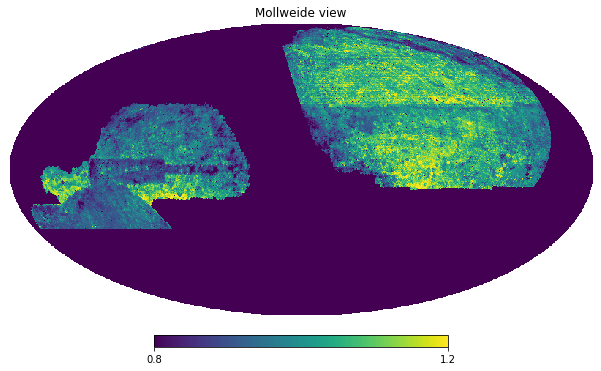

In [5]:
hp.mollview(m1, min=0.8, max=1.2, rot=-85)

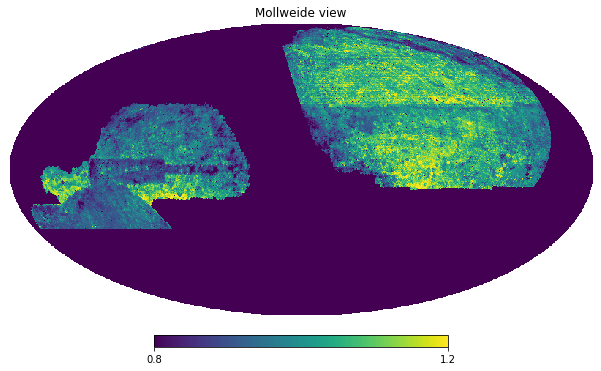

In [6]:
hp.mollview(m1, min=0.8, max=1.2, rot=-85)

In [7]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.lab import make_overdensity, AnaFast

In [8]:
from glob import glob

In [9]:
windows = glob('/home/mehdi/data/tanveer/elg_mse_snapshots/windows/win*.fits')
len(windows)

1000

In [10]:
af = AnaFast()

In [11]:
from tqdm.notebook import tqdm

In [12]:
cls = []
for window in tqdm(windows[0:100:10]):
    m_i = read(window)
    mask = m_i > 0.0
    cl_i = af.run(m_i, mask*1.0, mask)
    cls.append(cl_i)

In [13]:
np.array(cls).shape

(10, 3072)

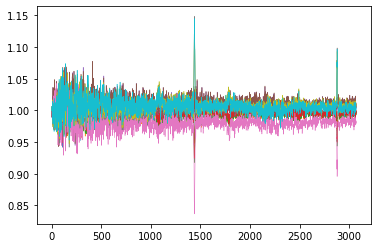

In [14]:
for cli in cls:
    plt.plot(cli/np.mean(cls, axis=0), lw=0.5)